In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec

/home/ppjanka/anaconda3/envs/intsh2/lib/python3.6/site-packages/ipykernel_launcher.py:115: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


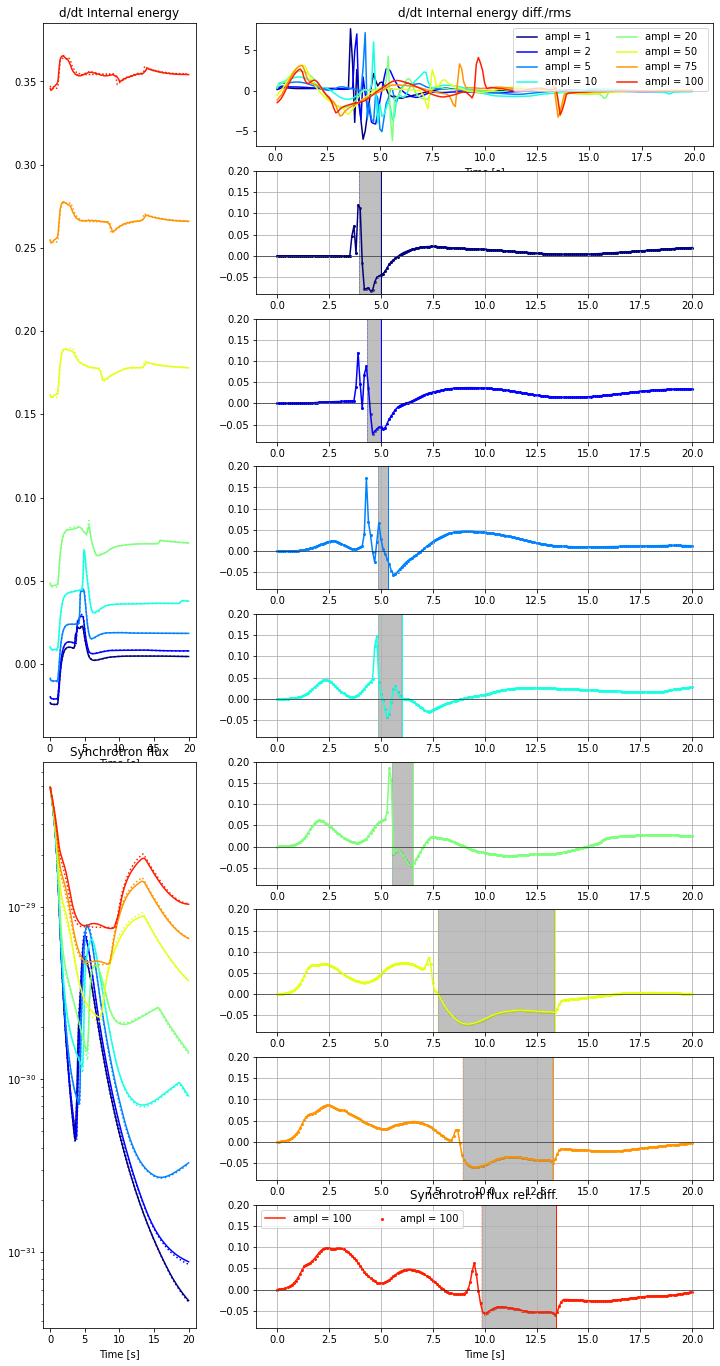

In [76]:
amplitudes = [1,2,5,10,20,50,75,100] # 10
n_ampl = len(amplitudes)

colors = {amplitudes[i]:cm.jet(1.0*i/n_ampl) for i in range(n_ampl)}
linestyles = {0:':', 1:'-'}

fig = plt.figure(figsize=(12,24))
gs = gridspec.GridSpec(9,2, width_ratios=[1,3])

# d/dt Internal energy ---------------------------------------
plt.subplot(gs[0:5,0])
for ampl in amplitudes:
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data = pkl.load(f)
        
        if corr == 0:
            plt.plot(data['times'][:-1], data['ddt_internal_energy'][:-1], color=colors[ampl], ls=linestyles[corr])
        else:
            plt.plot(data['times'][:-1], data['ddt_internal_energy'][:-1], color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
        del data
#plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('d/dt Internal energy')

# d/dt Internal energy difference -----------------------------
plt.subplot(gs[0,1])
for ampl in amplitudes:
    data = {}
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data[corr] = pkl.load(f)
        
    difference = data[1]['ddt_internal_energy'][:-1] - data[0]['ddt_internal_energy'][:-1]
    #average = 0.5 * (data[1]['ddt_internal_energy'][:-1] + data[0]['ddt_internal_energy'][:-1])
    rms = np.sqrt(np.nanmean(difference**2))
    plt.plot(data[0]['times'][:-1], difference/rms, color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
    del data

plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('d/dt Internal energy diff./rms')

# Synchrotron flux ------------------------------------------
plt.subplot(gs[5:,0])
for ampl in amplitudes:
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data = pkl.load(f)
        
        if corr == 0:
            plt.plot(data['times'], data['flux_density'], color=colors[ampl], ls=linestyles[corr])
        else:
            plt.plot(data['times'], data['flux_density'], color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
        
        del data
plt.gca().set_yscale('log')
#plt.legend(ncol=1)
plt.xlabel('Time [s]')
plt.title('Synchrotron flux')

# Synchrotron flux difference --------------------------------
for ampl in amplitudes:
    data = {}
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data[corr] = pkl.load(f)
        
    difference = data[1]['flux_density'] - data[0]['flux_density']
    average = 0.5 * (data[1]['flux_density'] + data[0]['flux_density'])
    
    plt.subplot(gs[1+amplitudes.index(ampl),1])
    plt.plot(data[0]['times'], difference/average, color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl))
    plt.scatter(data[0]['times'], difference/average, color=colors[ampl], ls=linestyles[corr], label=('ampl = %i' % ampl), s=4)
        
    del data

plt.legend(ncol=2)
plt.xlabel('Time [s]')
plt.title('Synchrotron flux rel. diff.')

# Times of collision start and peak emission --------------------------------
for ampl in amplitudes:
    time_start = []
    time_peak = []
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data = pkl.load(f)
            
        df = data['flux_density'][1:] - data['flux_density'][:-1]
        dt = data['times'][1:] - data['times'][:-1]
        tavg = 0.5*(data['times'][1:] + data['times'][:-1])

        dfdt = df/dt
        idx_start = np.argmax(dfdt)
        time_start.append(data['times'][idx_start])

        d_dfdt = dfdt[(idx_start+1):] * dfdt[idx_start:-1]
        idx_peak = idx_start + np.where(d_dfdt < 0)[0][0]
        time_peak.append(0.5 * (tavg[idx_peak] + tavg[idx_peak+1]))
        
        del data, df, dt, dfdt, d_dfdt
    
    if False:
        for j in range(2):
            for i in range(2):
                if j*i == 1: continue
                plt.subplot(gs[j,i])
                #plt.fill_between(tavg, -1., 1., where=((tavg > time_start[0]) & (tavg < time_start[1])), transform=plt.gca().get_xaxis_transform())
                plt.axvline(np.mean(time_start), color=colors[ampl], linewidth=0.5, linestyle=":")
                plt.axvline(np.mean(time_peak),  color=colors[ampl], linewidth=1.0, linestyle="-")
            
    plt.subplot(gs[1+amplitudes.index(ampl),1])
    plt.fill_between(tavg, 0,1, where=((tavg >= np.mean(time_start)) & (tavg <= np.mean(time_peak))), transform=plt.gca().get_xaxis_transform(), color='grey', alpha=0.5)
    plt.axvline(np.mean(time_start), color=colors[ampl], linewidth=0.5, linestyle=":")
    plt.axvline(np.mean(time_peak),  color=colors[ampl], linewidth=1.0, linestyle="-")
    
    plt.ylim(-0.09,0.2)
    plt.axhline(0., color='k', linewidth=0.5)
    plt.grid(True)

if False:
    plt.savefig('pencil_amplitude.png', format='png', dpi=600)
else:
    plt.show()
plt.close()

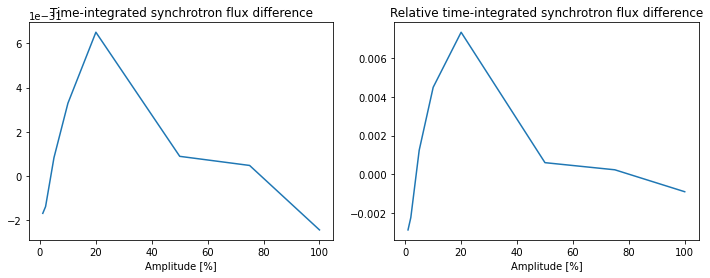

In [83]:
# Integrated net Synchrotron flux difference --------------------------------
synchro_diff_tot = {}
synchro_mean_tot = {}
for ampl in amplitudes:
    data = {}
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data[corr] = pkl.load(f)
            
    total_emission = 0.5 * (data[1]['flux_density'] + data[0]['flux_density'])
    total_emission = 0.5 * (total_emission[1:] + total_emission[:-1])
        
    difference = data[1]['flux_density'] - data[0]['flux_density']
    difference = 0.5 * (difference[1:] + difference[:-1])
    
    dt = data[0]['times'][1:] - data[0]['times'][:-1]
    
    synchro_diff_tot[ampl] = np.sum(difference*dt)
    synchro_mean_tot[ampl] = np.sum(total_emission*dt)
    
    del data
    
# plot

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(synchro_diff_tot.keys(), synchro_diff_tot.values())
plt.xlabel('Amplitude [%]')
plt.title('Time-integrated synchrotron flux difference')
    
plt.subplot(122)
plt.plot(synchro_diff_tot.keys(), np.array(list(synchro_diff_tot.values())) / np.array(list(synchro_mean_tot.values())))
plt.xlabel('Amplitude [%]')
plt.title('Relative time-integrated synchrotron flux difference')

plt.show()
plt.close()

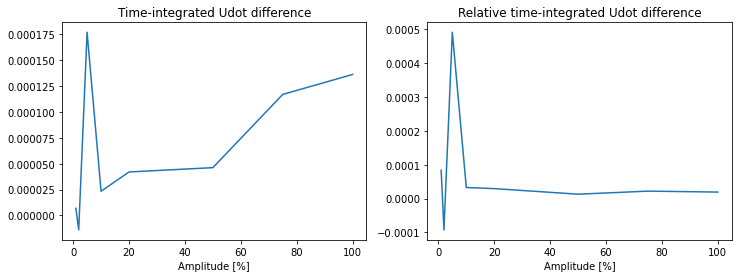

In [94]:
# Integrated net Internal energy time derivative difference --------------------------------
Udot_diff_tot = {}
Udot_mean_tot = {}
for ampl in amplitudes:
    data = {}
    for corr in [0,1]:
        with open('/DATA/Dropbox/LOOTRPV/astro_projects/2020_IntSh2/athena4p2/bin_paper1/prod1_corr_ampl/results_corr%iampl%i/history.pkl' % (corr, ampl), 'rb') as f:
            data[corr] = pkl.load(f)
            
    total_Udot = 0.5 * (data[1]['ddt_internal_energy'][1:-1] + data[0]['ddt_internal_energy'][1:-1])
    total_Udot = 0.5 * (total_Udot[1:] + total_Udot[:-1])
        
    difference = data[1]['ddt_internal_energy'][1:-1] - data[0]['ddt_internal_energy'][1:-1]
    difference = 0.5 * (difference[1:] + difference[:-1])
    
    dt = data[0]['times'][3:] - data[0]['times'][2:-1]
    
    Udot_diff_tot[ampl] = np.sum(difference*dt)
    Udot_mean_tot[ampl] = np.sum(total_Udot*dt)
    
    del data
    
# plot

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.plot(Udot_diff_tot.keys(), Udot_diff_tot.values())
plt.xlabel('Amplitude [%]')
plt.title('Time-integrated Udot difference')
    
plt.subplot(122)
plt.plot(Udot_diff_tot.keys(), np.array(list(Udot_diff_tot.values())) / np.array(list(Udot_mean_tot.values())))
plt.xlabel('Amplitude [%]')
plt.title('Relative time-integrated Udot difference')

plt.show()
plt.close()